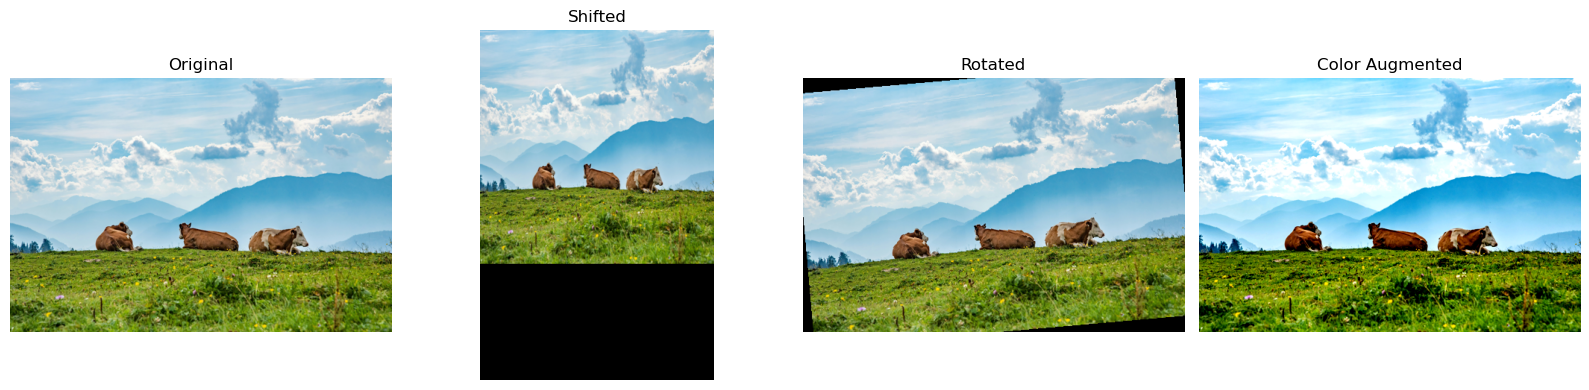

In [31]:
import torchvision.transforms.v2.functional as TF
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('/home/jovyan/work/assets/images/cnns/cows2_small.png')

image.thumbnail((512, 512))

# Apply transformations
# 1. Original Image (already loaded as 'image')
# 2. Shifted Version
shifted_image = TF.affine(image, angle=0, translate=(150, 0), scale=1, shear=0)

cropped_image = TF.resized_crop_image(TF.pil_to_tensor(image), left=0, top=0, height=512, width=512, size=image.size)



cropped_image = TF.to_pil_image(cropped_image)


# 3. Rotated Version (10 degrees)
rotated_image = TF.rotate(image, angle=5)

# 4. Color Augmented Version
color_aug= TF.adjust_contrast(image, 1.5)


# Plotting the images
images = [image, cropped_image, rotated_image, color_aug]
titles = ['Original', 'Shifted', 'Rotated', 'Color Augmented']

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

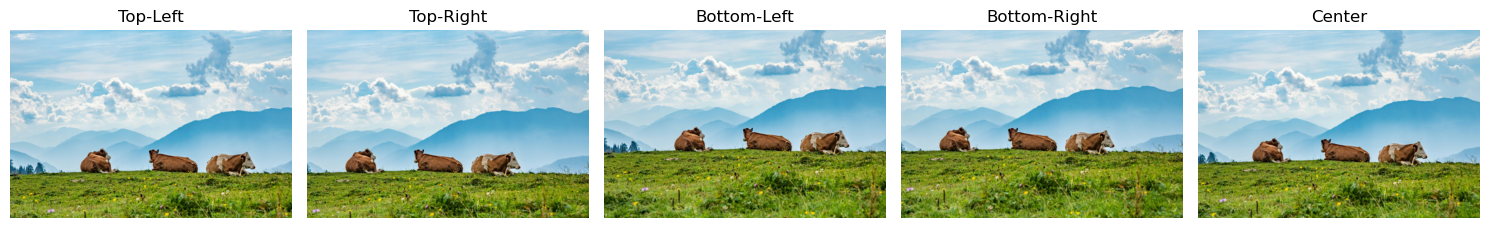

In [32]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('/home/jovyan/work/assets/images/cnns/cows2_small.png')
image2 = Image.open('/home/jovyan/work/assets/images/cnns/cows2_small_detections.png')

image.thumbnail((512, 512))


height, width = int(image.size[0] * 0.9), int(image.size[1] * 0.9)

# Define the crop size
crop_size = (height, width)

# Generate different crops
# Using predefined positions
width, height = image.size

crop_positions = [
    (0, 0),  # Top-left corner
    (width - crop_size[0], 0),  # Top-right corner
    (0, height - crop_size[1]),  # Bottom-left corner
    (width - crop_size[0], height - crop_size[1]),  # Bottom-right corner
    ((width - crop_size[0]) // 2, (height - crop_size[1]) // 2)  # Center
]

crops = []
for x, y in crop_positions:
    crop = image.crop((x, y, x + crop_size[0], y + crop_size[1]))
    crops.append(crop)

# Plotting the cropped images
titles = ['Top-Left', 'Top-Right', 'Bottom-Left', 'Bottom-Right', 'Center']

fig, axes = plt.subplots(1, len(crops), figsize=(15, 3))
for ax, img, title in zip(axes, crops, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


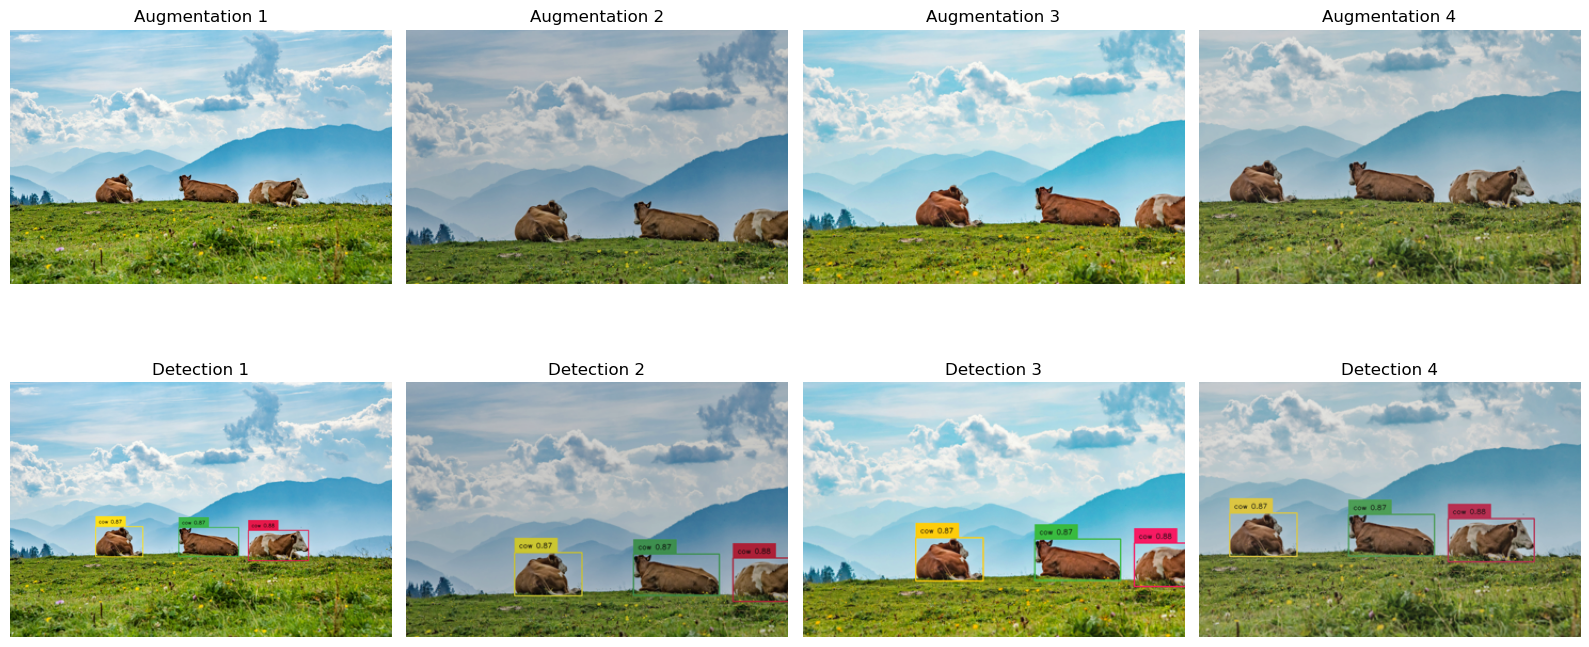

In [46]:
import random
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


random.seed(123)

# Load the images
image = Image.open('/home/jovyan/work/assets/images/cnns/cows2_small.png')
image2 = Image.open('/home/jovyan/work/assets/images/cnns/cows2_small_detection.png')

# Ensure both images are the same size
image.thumbnail((512, 512))
image2.thumbnail((512, 512))

# Define the number of augmentations
num_samples = 3

# Get image dimensions
width, height = image.size

# Define the crop size (e.g., 90% of the original size)
crop_height = int(height * 0.7)
crop_width = int(width * 0.7)
crop_size = (crop_height, crop_width)

# Prepare lists to store augmented images
augmented_images1 = []
augmented_images2 = []

augmented_images1.append(image)
augmented_images2.append(image2)

for _ in range(num_samples):
    # Random Crop Parameters
    max_x = width - crop_width
    max_y = height - crop_height
    x = random.randint(0, max_x)
    y = random.randint(0, max_y)
    crop_box = (x, y, x + crop_width, y + crop_height)
    
    # Crop both images
    crop1 = image.crop(crop_box)
    crop2 = image2.crop(crop_box)
    
    # Random Color Adjustment Parameters
    brightness_factor = random.uniform(0.8, 1.2)
    contrast_factor = random.uniform(0.8, 1.2)
    saturation_factor = random.uniform(0.8, 1.2)
    hue_factor = random.uniform(-0.02, 0.02)
    
    # Apply Color Adjustments to both images
    crop1 = transforms.functional.adjust_brightness(crop1, brightness_factor)
    crop1 = transforms.functional.adjust_contrast(crop1, contrast_factor)
    crop1 = transforms.functional.adjust_saturation(crop1, saturation_factor)
    crop1 = transforms.functional.adjust_hue(crop1, hue_factor)
    
    crop2 = transforms.functional.adjust_brightness(crop2, brightness_factor)
    crop2 = transforms.functional.adjust_contrast(crop2, contrast_factor)
    crop2 = transforms.functional.adjust_saturation(crop2, saturation_factor)
    crop2 = transforms.functional.adjust_hue(crop2, hue_factor)
    
    # Append augmented images to the lists
    augmented_images1.append(crop1)
    augmented_images2.append(crop2)

# Plotting the augmented images

num_samples += 1
fig, axes = plt.subplots(2, num_samples, figsize=(num_samples * 4, 8))

for i in range(num_samples):
    axes[0, i].imshow(augmented_images1[i])
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_ylabel('Image 1', fontsize=14)
    
    axes[1, i].imshow(augmented_images2[i])
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_ylabel('Image 2', fontsize=14)
    
    axes[0, i].set_title(f'Augmentation {i+1}', fontsize=12)
    axes[1, i].set_title(f'Detection {i+1}', fontsize=12)

plt.tight_layout()
plt.savefig('/home/jovyan/work/assets/images/cnns/cows2_small_detection_collage.png', dpi=100)
plt.show()


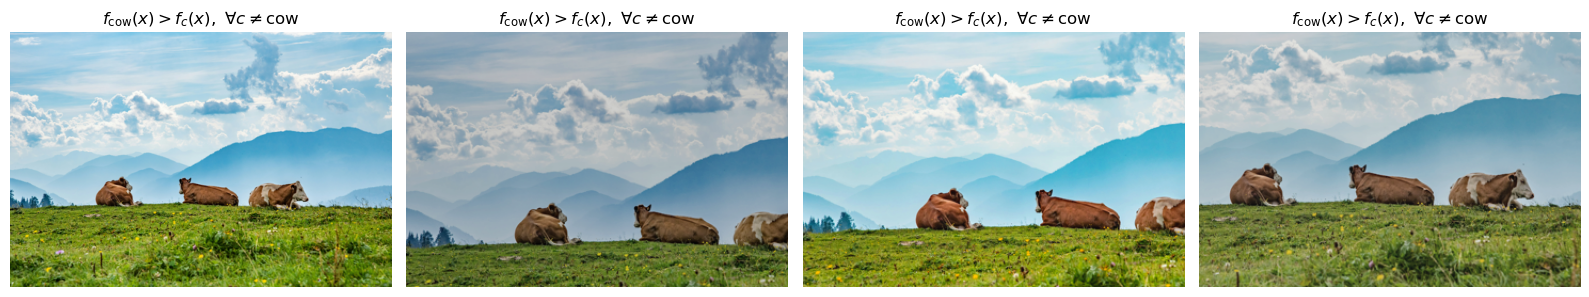

In [51]:
import random
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


random.seed(123)

# Load the images
image = Image.open('/home/jovyan/work/assets/images/cnns/cows2_small.png')

# Ensure both images are the same size
image.thumbnail((512, 512))


# Define the number of augmentations
num_samples = 3

# Get image dimensions
width, height = image.size

# Define the crop size (e.g., 90% of the original size)
crop_height = int(height * 0.7)
crop_width = int(width * 0.7)
crop_size = (crop_height, crop_width)

# Prepare lists to store augmented images
augmented_images1 = []


augmented_images1.append(image)

for _ in range(num_samples):
    # Random Crop Parameters
    max_x = width - crop_width
    max_y = height - crop_height
    x = random.randint(0, max_x)
    y = random.randint(0, max_y)
    crop_box = (x, y, x + crop_width, y + crop_height)
    
    # Crop both images
    crop1 = image.crop(crop_box)
    
    # Random Color Adjustment Parameters
    brightness_factor = random.uniform(0.8, 1.2)
    contrast_factor = random.uniform(0.8, 1.2)
    saturation_factor = random.uniform(0.8, 1.2)
    hue_factor = random.uniform(-0.02, 0.02)
    
    # Apply Color Adjustments to both images
    crop1 = transforms.functional.adjust_brightness(crop1, brightness_factor)
    crop1 = transforms.functional.adjust_contrast(crop1, contrast_factor)
    crop1 = transforms.functional.adjust_saturation(crop1, saturation_factor)
    crop1 = transforms.functional.adjust_hue(crop1, hue_factor)
    
    # Append augmented images to the lists
    augmented_images1.append(crop1)


# Plotting the augmented images

num_samples += 1
fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 4, 4))

for i in range(num_samples):
    axes[i].imshow(augmented_images1[i])
    axes[i].axis('off')
    if i == 0:
        axes[i].set_ylabel('Image 1', fontsize=14)
    

    #axes[i].set_title(f'P(cow|x) > P(any|x)', fontsize=12)
    #axes[i].set_title(r'$P(\text{cow}\,|\,x) > P(c\,|\,x),\ \forall c \neq \text{cow}$', fontsize=12)
    axes[i].set_title(r'$f_{\text{cow}}(x) > f_c(x),\ \forall c \neq \text{cow}$', fontsize=12)



plt.tight_layout()
plt.savefig('/home/jovyan/work/assets/images/cnns/cows2_small_invariance_collage.png', dpi=100)
plt.show()
